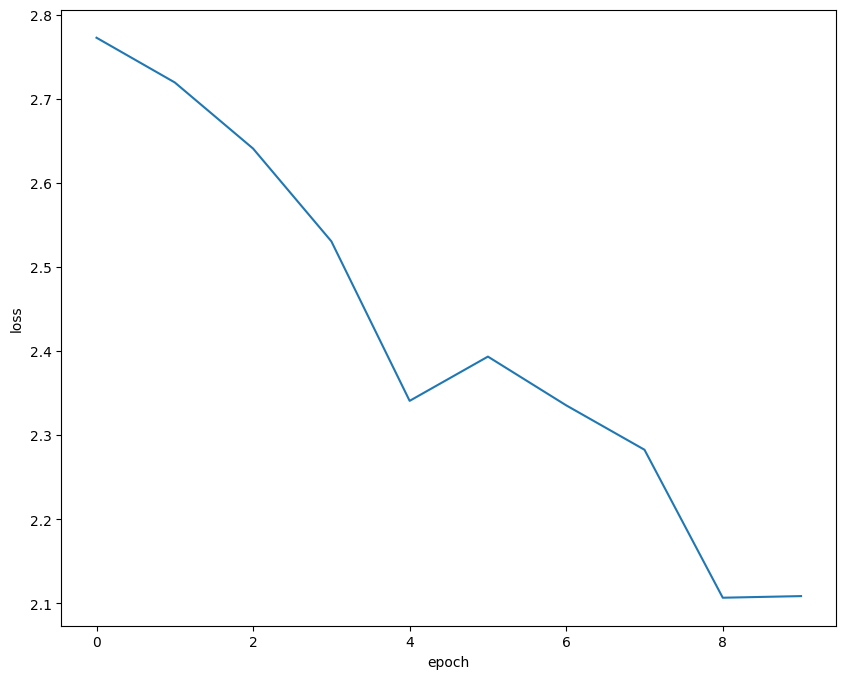

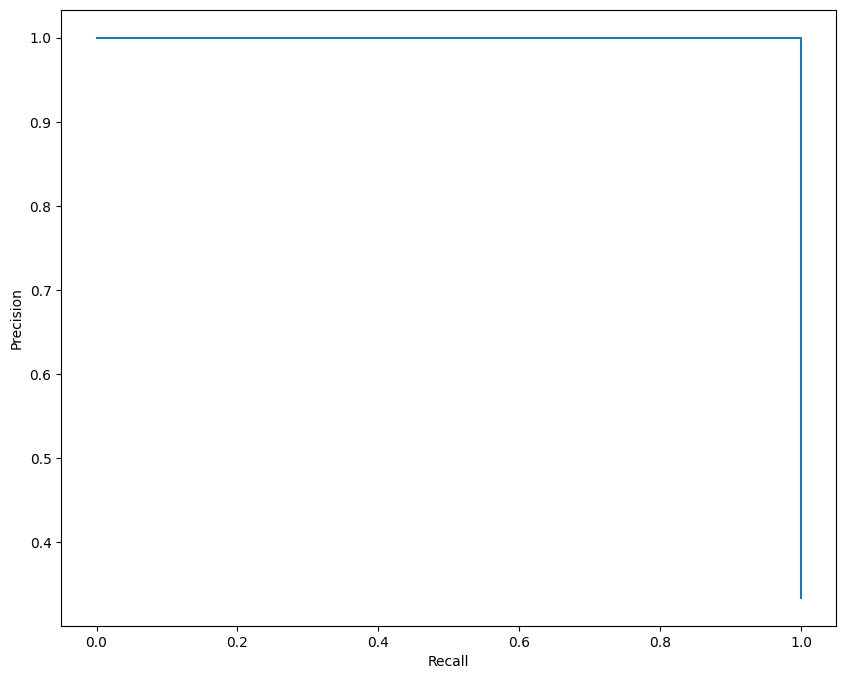

In [1]:
# Logistic Regression for simple data
import torch
import pandas as pd
import math
import matplotlib.pyplot as plt
# Read and preprocess data
orig_data = pd.read_csv("./train/iris.csv")
data = orig_data.copy(deep=False)
data['species'] = (data['species'] == 'setosa').astype('int32')
x = data.drop(columns=['species'])
y = data['species']
def standardize(data):
    df = data.copy()
    for column in df.columns:
        df[column] = (df[column]-df[column].mean())/df[column].std()
    return df
x = standardize(x)
# Split data into test and train
x_train = x.iloc[x.index % 5 != 0]
x_test = x.iloc[x.index % 5 == 0]
y_train = y.iloc[y.index % 5 != 0]
y_test = y.iloc[y.index % 5 == 0]
x_train = torch.tensor(x_train.values)
y_train = torch.tensor(y_train.values)
x_test = torch.tensor(x_test.values)
y_test = torch.tensor(y_test.values)
# Perform logistic regression
def logistic(x):
    return 1/(1+math.pow(math.e, -x))
w = torch.zeros(x_train.size(dim=1))
learning_rate = 0.01
lambdaHyperpameter = 0.00001
m = 4
iterations = 10
losses = torch.zeros(iterations)
best_weights = torch.zeros(x_train.size(dim=1))
min_loss = float('inf')
bias = 0
for epoch in range(iterations):
    miniBatch = torch.randint(x_train.size(dim=0),(m,))
    # Calculate loss
    # Equation shown below in markdown
    loss = 0
    for i in miniBatch:
        yHat = logistic(torch.dot(w, x_train[i].float()))
        loss -= y_train[i]*math.log(yHat)+(1-y_train[i])*math.log(1-yHat)
    if(loss<min_loss):
        min_loss = loss
        best_weights = w
    losses[epoch] = loss
    # Calculate gradient
    # Equation shown below in markdown
    gradient = torch.zeros(w.size(dim=0))
    for j in range(w.size(dim=0)):
        for i in miniBatch:
            gradient[j] += (logistic(torch.dot(w, x_train[i].float())+bias)-y_train[i])*x_train[i][j] + 2*lambdaHyperpameter*w[j]
    # Update weights
    w -= learning_rate*gradient
w = best_weights
# Plot loss vs epoch
plt.figure(figsize=[10,8])
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
# Make predictions
y_pred = torch.zeros(x_test.size(dim=0))
for i in range(x_test.size(dim=0)):
    y_pred[i] = logistic(torch.dot(w, x_test[i].float())+bias)
# Calculate precision and recall for different thresholds
thresholds = torch.linspace(0,1,100)
precision = torch.zeros(thresholds.size(dim=0))
recall = torch.zeros(thresholds.size(dim=0))
index = 0
for threshold in thresholds:
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(x_test.size(dim=0)):
        if(y_pred[i] >= threshold):
            if(y_test[i] == 1):
                tp += 1
            else:
                fp += 1
        else:
            if(y_test[i] == 0):
                tn += 1
            else:
                fn += 1
    if(fp == 0):
        precision[index] = 1
    else:
        precision[index] = float(tp)/(tp+fp)
    if(fn == 0):
        recall[index] = 1
    else:
        recall[index] = float(tp)/(tp+fn)
    index += 1
# Plot precision and recall
plt.figure(figsize=[10,8])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall,precision)

A perfect precision vs recall graph! This proves that our model works :)